# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study.groupby('Mouse ID').count())

print(number_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicated_mouse)
duplicate_mouse_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_mouse_data.head()

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_mouse_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data.groupby('Mouse ID').count())

248

## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_reg_mean = clean_mouse_data.groupby('Drug Regimen').mean(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_med = clean_mouse_data.groupby('Drug Regimen').median(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_var = clean_mouse_data.groupby('Drug Regimen').var(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_stdev = clean_mouse_data.groupby('Drug Regimen').std(numeric_only=True)["Tumor Volume (mm3)"]
drug_reg_sem = clean_mouse_data.groupby('Drug Regimen').sem(numeric_only=True)["Tumor Volume (mm3)"]

# Create each grouping of mean, median, variance, std dev, and std error for each drug name to be pulled in to a dataframe

summary_stat_table = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,"Median Tumor Volume": drug_reg_med,"Tumor Volume Variance": drug_reg_var,"Tumor Volume Std. Dev.": drug_reg_stdev,"Tumor Volume Std. Err.": drug_reg_sem})

summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
summary_agg_table = clean_mouse_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem']) 
summary_agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Regimen over Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

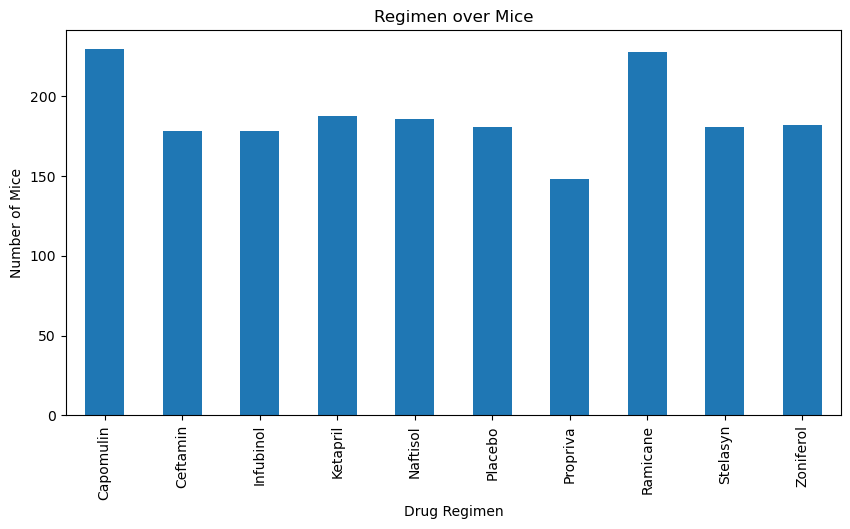

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_number_of_mice = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

bar_number_of_mice.plot.bar(title='Regimen over Mice',y='Number of Mice',figsize=(10,5))

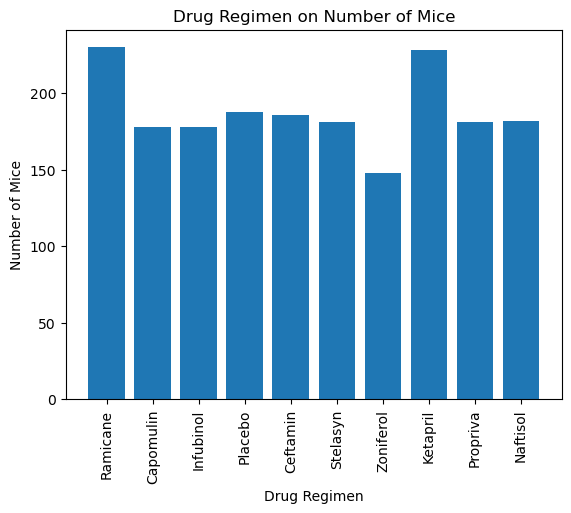

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_names = clean_mouse_data['Drug Regimen'].unique()

# Create a list indicating where to write labels and set figure size
x_axis = drug_names
y_axis = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')



plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

Text(0.5, 1.0, 'Distribution of Female vs Male')

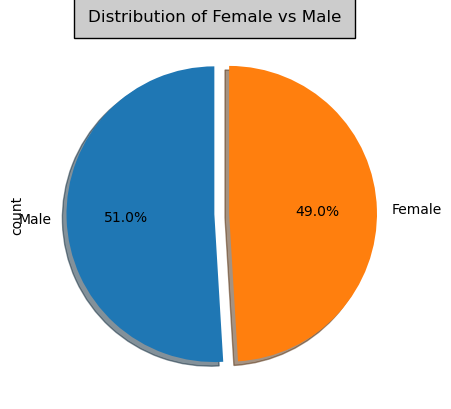

In [29]:
# Generate a pie plot showing the distribution of female versus mversus_sex = clean_mouse_data['Sex'].value_counts()
gender = clean_mouse_data['Sex'].value_counts()
gender.plot(kind='pie',y='', autopct='%1.1f%%', startangle=90, shadow=True,explode=(0,0.1))
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':10})


(-1.1049977227391237,
 1.2049524141830756,
 -1.1001503025552368,
 1.1031578252724032)

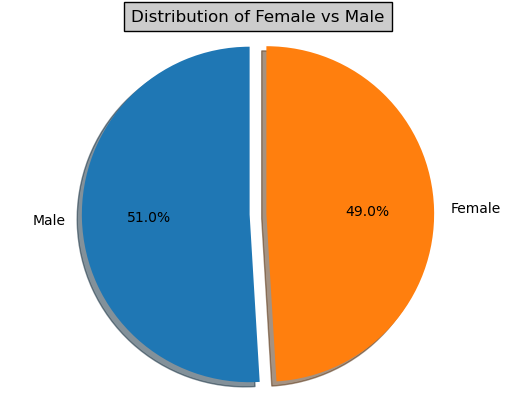

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
sizes = [958,922]
explode=(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})
ax1.axis('equal') 

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
greatest_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = greatest_timepoint_df.merge(clean_mouse_data,on=['Mouse ID','Timepoint'], how='left')
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment_names[name]]
max_timepoint_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')



Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

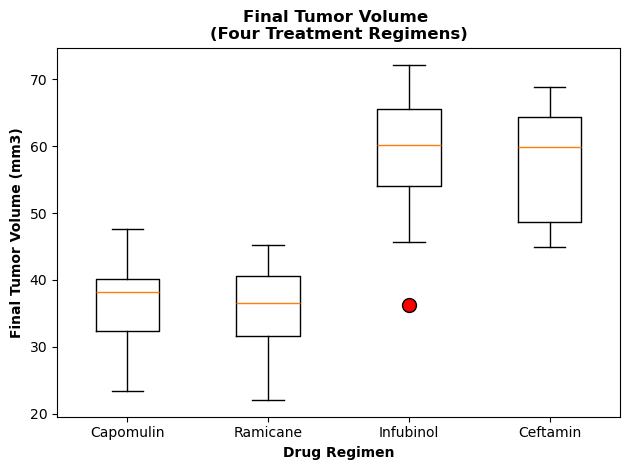

In [122]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')


plt.tight_layout()


# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Line and Scatter Plots

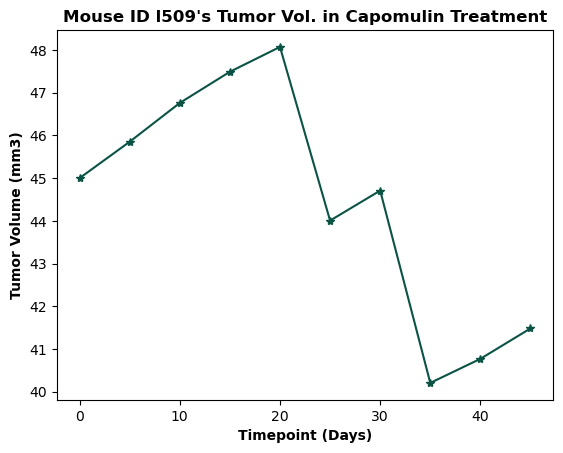

In [123]:
# Generate dataframe only in Capomulin Regimen
Capomulin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')


# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

In [110]:
Capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


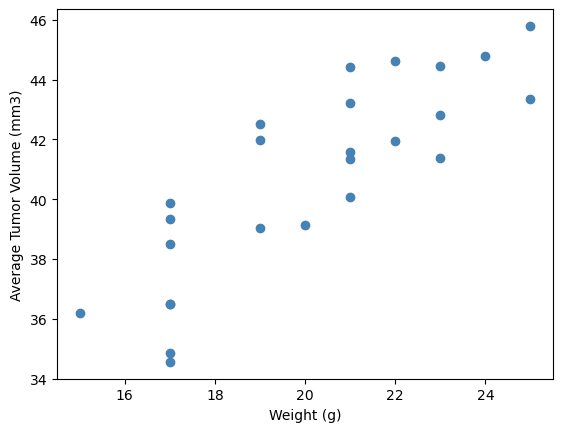

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)


#Format
plt.scatter(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'], color = "steelblue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
marker_size = 15
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


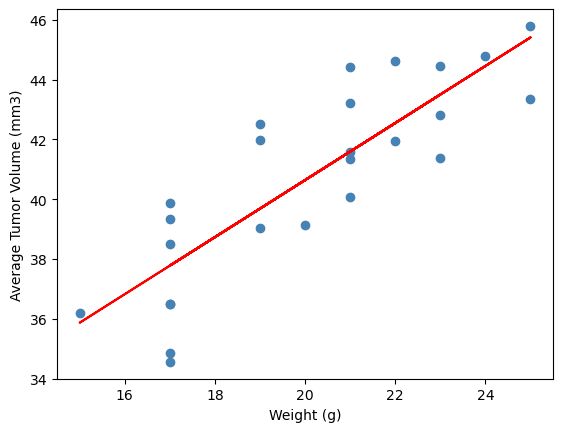

In [116]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre_coeff = st.pearsonr(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corre_coeff[0], 2)}")

# Calculating the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
values_for_formula = avg_capo_vol["Weight (g)"] * slope + intercept

plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color = 'steelblue')
plt.plot(avg_capo_vol["Weight (g)"], values_for_formula, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()